- ## 로지스틱 회귀
    - 이진 분류
        - 주어진 데이터를 두 개의 클래스로 나누는 분류기를 학습시키는 지도 학습 문제임
            - 지도 학습은 레이블이 있는 학습 데이터를 통해 학습시키는것을 의미함

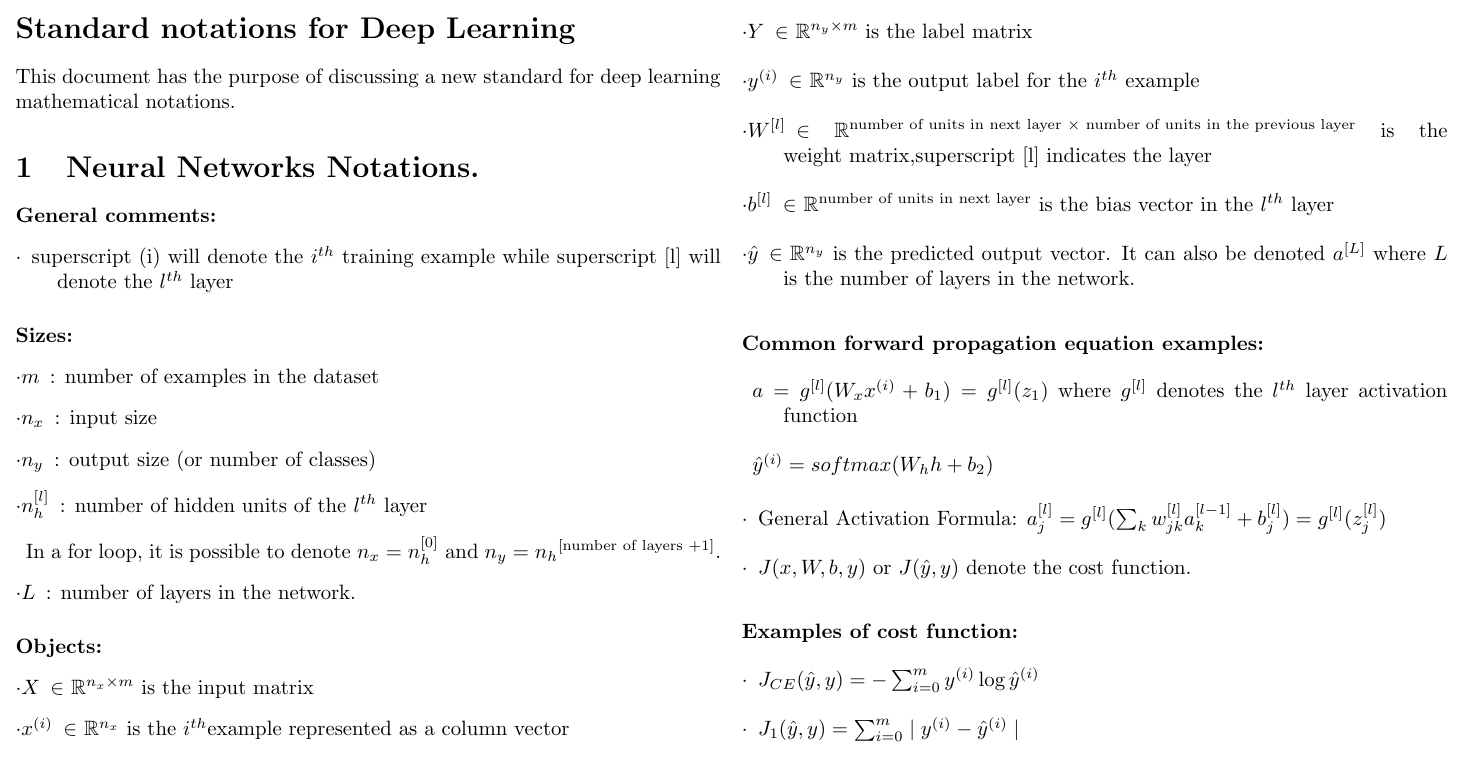

- ## 신경망 수식 해석
    - 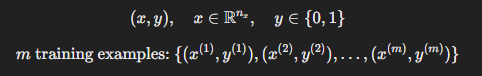
    - 훈련 표본 하나는 $(x,y)$로 이루어져있으며
    - $n_x$ 차원의 $x$와 레이블 값을 지닌 $y$로 이루어져 있다
    - 전체 훈련 표본 갯수을 $m = m_{train}$ 라 한다


    - 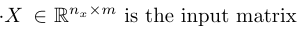
    - $X$를 $n_x*m$차원의 Input Matrix이라고 하며
    - 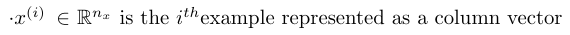
    - $x^{(i)}$은 $i$번째 표본의 행 벡터이다


    - 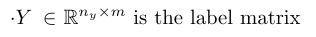
    - $Y$를 $n_y*m$차원의 Label Matrix이라고 한다 
    - 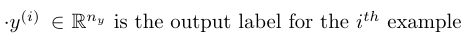
    - $y^{(i)}$는 $i$번째 표본의 레이블이다

    - 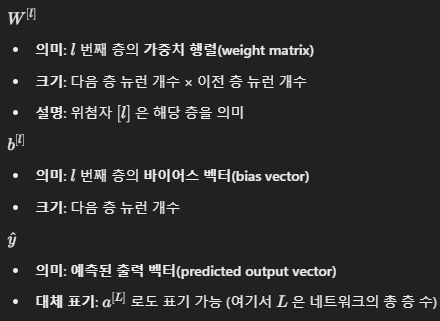



- ## 예시


    - 추정값 예시
        -   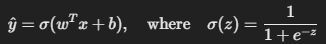
        - 추정치 $\hat{y}$를 가중치, 편향을 시그모이드 함수에 넣어서 구한 것

    - 손실 함수 예시
        - 손실 함수는 단일 학습에 대한 오류 계산임
        - 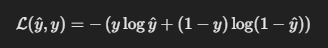
        - Binary Cross-Entropy Loss 수식임
    - 비용 함수 예시
        - 비용 함수는 전체 학습 세트에 대한 손실함수의 평균임
        - $J_{CE}(\hat{y}, y) = - \sum_{i=0}^{m} y^{(i)} \log \hat{y}^{(i)}$

        - $J_1(\hat{y}, y) = \sum_{i=0}^{m} \left| y^{(i)} - \hat{y}^{(i)} \right|$

### 경사 하강법 (Gradient Descent)

#### **1. 기본 경사 하강법 업데이트 식**
비용 함수의 경사를 타고 차근차근 내려와 극솟값에 도달하는것임


가중치 \( w \) 와 편향 \( b \) 를 경사 하강법을 이용하여 업데이트하는 식은 다음과 같다.

- 가중치 업데이트:
  $$
  w := w - \alpha \frac{\partial J}{\partial w}
  $$
- 비용함수에 대한 가중치의 편미분값을 학습률 $\alpha$만큼 곱해서 뺌
- 편향 업데이트:
  $$
  b := b - \alpha \frac{\partial J}{\partial b}
  $$
- 비용함수에 대한 편향의 편미분값을 학습률 $\alpha$만큼 곱해서 뺌


- ## 역전파 과정
    - $ z = w^T x + b $

    - $ \hat{y} = a = \sigma(z) $

    - $ \mathcal{L}(a, y) = - \left( y \log a + (1 - y) \log (1 - a) \right) $

    - 이 수식에서 손실함수에 대한 가중치의 미분값($w^t$), 편향의 미분값($b$)을  구해야함

    - 연쇄 법칙으로 구할 것

    - 수식은 다 나와있으니 도함수 통해서 구하면 됨

    - 해당 작업 이중 for 문 대신 최적화 위해 벡터화 사용함
    

- ## 벡터화
    - 딥러닝을 이중 for문으로 구현시 매우 느림
    - 이 대신 행렬형태로 처리해 for문을 제거함
    - 비벡터화 연산
    - 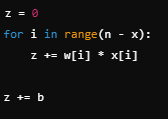
    - 벡터화 연산
    - 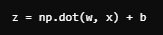

In [1]:
## 연산속도 비교

import time
import numpy as np

a = np.random.rand(100000)
b = np.random.rand(100000)

tic = time.time()
c = np.dot(a, b)
toc = time.time()

print(c)
print("Vectorized version: " + str(1000 * (toc - tic)) + "ms")

c = 0
tic = time.time()
for i in range(100000):
    c += a[i] * b[i]
toc = time.time()

print(c)
print("For loop: " + str(1000 * (toc - tic)) + "ms")


25064.266137196668
Vectorized version: 22.788047790527344ms
25064.266137196726
For loop: 21.353721618652344ms


- ## 벡터화 구현 예시
    -   np.exp(v)
    -   np.log(v)
    -   np.abs(v)
    -   np.maximum(v,0)
    - 넘파이 내장함수 사용할것

- ## 순전파 벡터화시
    -   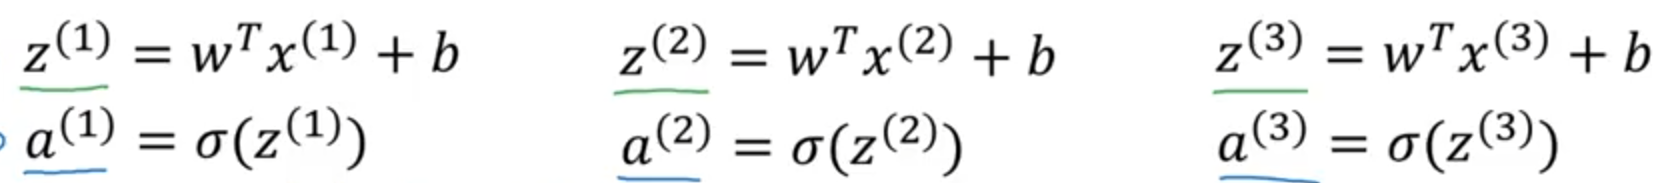
    - 훈련 데이터셋은 flatten 됀 다음 배치 단위로 입력됨
    - 각 훈련 데이터마다 반복적인 연산이 일어나고, 같은 층의 뉴런끼리 반복적인 연산이 일어남->이를 벡터화하면됨
    - $ Z = \begin{bmatrix} z^{(1)} & z^{(2)} & \dots & z^{(m)} \end{bmatrix} $

    - $ A = \begin{bmatrix} a^{(1)} & a^{(2)} & \dots & a^{(m)} \end{bmatrix} $

    - 기존 연산을 행렬 형태로 바꿔서 넘파이 함수 사용해 한번에 연산함
    

- ## 브로드캐스팅
    -   두 크기가 다른 행렬의 곱을 연산할 떄 작은 행렬이 자동으로 크기를 맞춰 요소별 계산을 함
    -   각 차원이 1이거나 일치하면 연산이 가능함
    - 과정
        1.   차원이 더 작을 경우 차원을 하나 늘린다 $(3,) \rightarrow (1,3)$
        2.  크기가 1인 차원을 곱하는 행렬과 크기가 같도록 값을 복제해 확장한다
        3. 행렬간 요소별 연산을 한다
    - 행렬 간 연산 최적화에 사용된다

    - $(5,)$ 같은 1차원 벡터는 직관적으로 연산돼지 않으니 대체하여
    - $(5,1)$ 또는 $(1,5)$ 행렬을 사용할 것
    - 디버깅을 위하여 assert 도 사용할 것

- ## 신경망 표기
    - 윗첨자로 뉴런의 레이어 표기 ex)$z^{[1]}$
    - 뉴런
        - 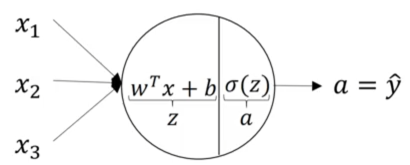
        - 입력, 선형 결합, 활성화 함수로 이루어져 있음
        1. 입력 층에서 데이터 값을 받음
            - 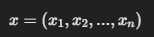
        2. 입력값에 가중치를 곱하고 편향을 더하여 각 입력에 대해 전부 연산한후 총합을 구해 선형결합을 구함
            - 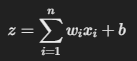
            - 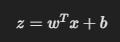
        3. 구한 선형 결합을 활성화 함수에 넣어 최종 출력 $\hat{y}$ 를 구한다.


        - 윗 첨자로 레이어를 표기하고, 아래첨자로 뉴런 번호를 표기함
            - $
                z_1^{[1]} = w_1^{[1]} x + b_1^{[1]}
                $

                $
                a_1^{[1]} = \sigma(z_1^{[1]})
                $
            - 첫 번째 레이어의 첫 뉴런임
            - $ z_2^{[1]} = w_2^{[1]T} x + b_2^{[1]} $

                $ a_2^{[1]} = \sigma(z_2^{[1]}) $
            - 첫 번쨰 레이어의 두번째 뉴런임


- ## 신경망 벡터화
    1. 레이어 단위로 벡터화하여 밑첨자 제거
        - 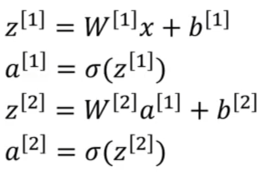
    2. 훈련 데이터별로 표기시 해당 표기법으로 변함
       - 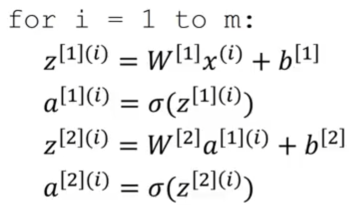
       - i번쨰 훈련데이터에 대한 2번째 레이어임
    3. 훈련 데이터단위로 벡터화하여 소괄호 제거

    - 신경망 단위로는 벡터화할필요 없나?

- ## 활성화 함수
    **Sigmoid**  
        $ \sigma(x) = \frac{1}{1 + e^{-x}} $

    **Tanh**  
        $ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

    **ReLU**  
        $ f(x) = \max(0, x) $

    **Leaky ReLU**  
        $ f(x) =
        \begin{cases} 
            x, & x > 0 \\ 
            \alpha x, & x \leq 0 
        \end{cases} $

    **ELU (Exponential Linear Unit)**  
        $ f(x) =
        \begin{cases} 
            x, & x > 0 \\ 
            \alpha (e^x - 1), & x \leq 0 
        \end{cases} $

    **Softmax**  
        $ \sigma(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}} $



    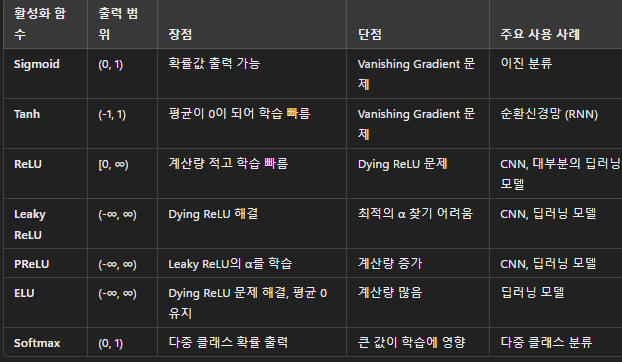

- ## 신경망에 비선형성이 필요한 이유
    - 모델의 표현력을 증대시키기 위해 필요함
    - 활성화 함수가 선형적일경우 만드는 경계선도 선형적인 형태를 띄게 됨(표현력 감소)
    - 이 때문에 매우 특수적인 상황을 제외하고는 은닉층에선 선형함수를 쓰는 경우가 드뭄

    - 의문점
        - 신경망의 모든 부분이 비선형적일 필요가 있나? 비선형적인 함수로 선형적인 표현을 하려면 무한으로 근사시켜야하지않나?
        - 이러한 비선형적인 함수를 선형적으로 근사시키면서 정확도는 유지하는 연구는 없나?
        - 제한된 뉴런의 신경망을 무한으로 근사시킬수나 있나?
        - 불가능하다면 거기에 대한 다른 표현이 필요하지않나?
        